In [32]:
import matplotlib.pyplot as plt
from city_course import BinomialModel, CallOptionPricer, DigitalCallOptionPricer, KOBarrierOptionPricer

In [2]:
S0 = 100.0
U = 0.05
R = 0.0

In [3]:
D_arr = [-0.05, -0.03, -0.01]
stock_price_arrays = {}
for D in D_arr:
    bin_model = BinomialModel(S0,U,D,R)
    stock_price_arrays[D] = [bin_model.calculateStockPrice(100, i) for i in range(100)]

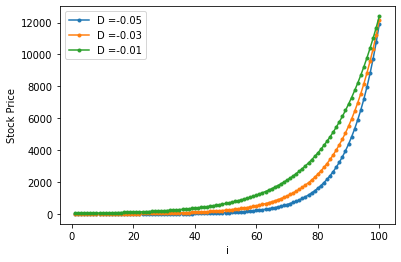

In [17]:
for k, v in stock_price_arrays.items():
    plt.plot(range(1, len(v) + 1), v, '.-', label='D =' + str(k))
plt.legend() 
plt.xlabel("i")
plt.ylabel("Stock Price")
plt.show()

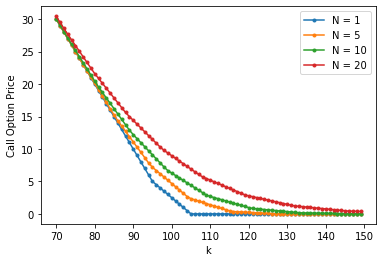

In [22]:
D = -0.05
N = [1, 5, 10, 20]
bin_model = BinomialModel(S0,U,D,R)
prices = {}
for n in N:
    call_option_pricer_list = [CallOptionPricer(n, k, bin_model) for k in range(70, 150)]
    prices[n] = [pricer.priceByCRR() for pricer in call_option_pricer_list]
    
for k, v in prices.items():
    plt.plot(range(70, 150), v, '.-', label='N = '+ str(k))
plt.legend() 
plt.xlabel("k")
plt.ylabel("Call Option Price")
plt.show()

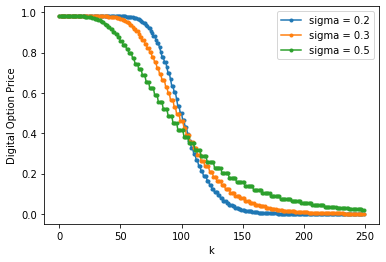

In [31]:
T = 1.0
N = 500          
r = 0.02
sigma_list = [0.2, 0.3, 0.5]
k_range = range(0, 250)
prices = {}
for sigma in sigma_list:
    bin_model = BinomialModel(S0, sigma, T, N, r)
    digital_option_pricer_list = [DigitalCallOptionPricer(N, k, bin_model) for k in k_range]
    prices[sigma] = [pricer.priceByCRR() for pricer in digital_option_pricer_list]

for k, v in prices.items():
    plt.plot(k_range, v, '.-', label='sigma = '+ str(k))
plt.legend() 
plt.xlabel("k")
plt.ylabel("Digital Option Price")
plt.show()

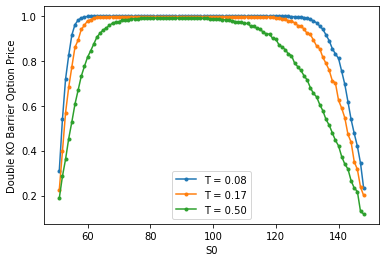

In [47]:
T_list = [1/12, 2/12, 6/12]
N = 50          
r = 0.02
sigma = 0.2

S0_range = range(51, 149)
lower_barrier = 50
upper_barrier = 150
prices = {}
for T in T_list:
    bin_model_list = [BinomialModel(S0, sigma, T, N, r) for S0 in S0_range]
    barrier_option_pricer_list = [KOBarrierOptionPricer(N, lower_barrier, upper_barrier, bin_model) 
                                  for bin_model in bin_model_list]
    prices[T] = [pricer.priceByCRR() for pricer in barrier_option_pricer_list]

for k, v in prices.items():
    plt.plot(S0_range, v, '.-', label="T = %.2f" % k)
plt.legend() 
plt.xlabel("S0")
plt.ylabel("Double KO Barrier Option Price")
plt.show()